In [84]:
import sys, os
import librosa
import torchaudio
import numpy as np
from glob import glob
from tqdm import tqdm
import shap
import xgboost
import numpy as np
import shap
import pandas as pd


parent_dir = os.path.dirname(os.path.realpath('/Users/iamco/OneDrive/Documents/Lindsey/Grad_School/EC_ENGR_214a/project/project/'))
project_dir = os.path.abspath(os.path.join(parent_dir, './ucla-ece-m214a-project-sri-main'))

#labels
y_train = np.loadtxt(project_dir + '/y_labels/current_y_train.csv')
y_test_clean = np.loadtxt(project_dir + '/y_labels/current_y_test_clean.csv')
y_test_noisy = np.loadtxt(project_dir + '/y_labels/current_y_test_noisy.csv')

#mfcc13
train_feat_mfcc_df = pd.read_csv(project_dir + '/dataFrame/mfcc13_train_feat.csv', index_col = 0)
test_clean_feat_mfcc_df = pd.read_csv(project_dir + '/dataFrame/mfcc13_test_clean.csv', index_col = 0)
test_noisy_feat_mfcc_df = pd.read_csv(project_dir + '/dataFrame/mfcc13_test_noisy.csv', index_col = 0)

#opensmile
train_feat_os_df = pd.read_csv(project_dir + '/dataFrame/OS_ComparE_train.csv', index_col = 0)
test_clean_feat_os_df = pd.read_csv(project_dir + '/dataFrame/OS_ComparE_test_clean.csv', index_col = 0)
test_noisy_feat_os_df = pd.read_csv(project_dir + '/dataFrame/OS_ComparE_test_noisy.csv', index_col = 0)

#LPC26
train_feat_lpc_df = pd.read_csv(project_dir + '/dataFrame/LPC26_train_feat.csv', index_col = 0)
test_clean_feat_lpc_df = pd.read_csv(project_dir + '/dataFrame/LPC26_test_clean.csv', index_col = 0)
test_noisy_feat_lpc_df = pd.read_csv(project_dir + '/dataFrame/LPC26_test_noisy.csv', index_col = 0)

#PLP
train_feat_plp_df = pd.read_csv(project_dir + '/dataFrame/PLP_train.csv', index_col = 0)
test_clean_feat_plp_df = pd.read_csv(project_dir + '/dataFrame/PLP_test_clean.csv', index_col = 0)
test_noisy_feat_plp_df = pd.read_csv(project_dir + '/dataFrame/PLP_test_noisy.csv', index_col = 0)

#PLP_Delta_Delta
train_feat_plp_delta_df = pd.read_csv(project_dir + '/dataFrame/PLP_delta_train.csv', index_col = 0)
test_clean_feat_plp_delta_df = pd.read_csv(project_dir + '/dataFrame/PLPdelta_test_clean.csv', index_col = 0)
test_noisy_feat_plp_delta_df = pd.read_csv(project_dir + '/dataFrame/PLP_delta_test_noisy.csv', index_col = 0)

#PNCC
train_feat_pncc_df = pd.read_csv(project_dir + '/dataFrame/PNCC_train.csv', index_col = 0)
test_clean_feat_pncc_df = pd.read_csv(project_dir + '/dataFrame/PNCC_test_clean.csv', index_col = 0)
test_noisy_feat_pncc_df = pd.read_csv(project_dir + '/dataFrame/PNCC_test_noisy.csv', index_col = 0)

#Wav2Vec2
train_feat_Wav2Vec2_df = pd.read_csv(project_dir + '/dataFrame/Wav2Vec2_train.csv', index_col = 0)
test_clean_feat_Wav2Vec2_df = pd.read_csv(project_dir + '/dataFrame/Wav2Vec2_test_clean.csv', index_col = 0)
test_noisy_feat_Wav2Vec2_df = pd.read_csv(project_dir + '/dataFrame/Wav2Vec2_test_noisy.csv', index_col = 0)

#Wav2Vec2 Combined
train_feat_Wav2Vec2_Combined_df = pd.read_csv(project_dir + '/dataFrame/Wav2Vec2_Combined_train.csv', index_col = 0)
test_clean_feat_Wav2Vec2_Combined_df = pd.read_csv(project_dir + '/dataFrame/Wav2Vec2_Combined_clean.csv', index_col = 0)
test_noisy_feat_Wav2Vec2_Combined_df = pd.read_csv(project_dir + '/dataFrame/Wav2Vec2_Combined_test_noisy.csv', index_col = 0)

train_feat_df = pd.concat((train_feat_mfcc_df, train_feat_os_df, train_feat_lpc_df, train_feat_plp_delta_df, train_feat_pncc_df), axis=1) #train_feat_Wav2Vec2_Combined_df, ... train_feat_plp_df, train_feat_Wav2Vec2_df
test_clean_feat_df = pd.concat((test_clean_feat_mfcc_df, test_clean_feat_os_df, test_clean_feat_lpc_df, test_clean_feat_plp_delta_df, test_clean_feat_pncc_df), axis=1) #test_clean_feat_Wav2Vec2_df test_clean_feat_Wav2Vec2_Combined_df, ... test_clean_feat_plp_df, test_clean_feat_Wav2Vec2_df
test_noisy_feat_df = pd.concat((test_noisy_feat_mfcc_df, test_noisy_feat_os_df, test_noisy_feat_lpc_df, test_noisy_feat_plp_delta_df, test_noisy_feat_pncc_df), axis=1) #test_noisy_feat_Wav2Vec2_Combined_df, ... test_noisy_feat_plp_df, test_noisy_feat_Wav2Vec2_df




In [12]:
#print(train_feat_df)
#print(test_clean_feat_df)
#print(test_noisy_feat_df)

from IPython.display import display

display(train_feat_df, test_clean_feat_df, test_noisy_feat_df)


,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,plp_3,plp_4,plp_5,plp_6,plp_7,plp_8,plp_9,plp_10,plp_11,plp_12
0,-504.84580,191.30957,-38.434734,6.514131,-0.122721,-1.844143,-15.678275,-13.809437,-13.378094,-9.308198,...,-13.845116,-14.607061,-13.606403,-19.173854,-17.174807,-16.121728,-13.384442,-9.729127,-12.619592,-9.873103
1,-547.92010,187.19193,-13.385132,1.201424,-5.452264,4.607437,-0.434239,-10.600310,-17.993532,-18.510350,...,-16.501471,-17.271832,-10.380613,-11.551835,-15.570245,-18.429447,-17.985518,-13.217258,-11.959376,-10.765729
2,-627.84534,143.62398,-1.936931,8.223982,-0.022424,-4.055673,-12.092563,-5.764001,-5.375330,-9.784265,...,-12.990190,-14.556912,-14.712168,-17.380998,-13.152090,-12.120345,-13.622475,-10.977810,-10.488560,-8.485139
3,-561.81990,154.49652,-1.690910,19.689285,-11.594455,-16.276707,-19.980886,-9.442737,-11.217268,-9.685789,...,-7.257539,-20.342928,-20.822686,-21.325160,-14.991457,-15.041315,-13.573238,-11.753722,-13.019926,-7.767490
4,-652.07490,157.04901,1.101507,8.531623,-3.911249,-0.730720,-5.176412,-6.703515,-6.316424,-3.663954,...,-12.836372,-16.501325,-13.049691,-13.922922,-13.621847,-12.590893,-10.562320,-9.899857,-8.958982,-7.670310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8975,-560.02740,158.57430,26.492144,21.150293,0.955917,9.170902,-0.349469,-16.286762,-12.883808,-1.031181,...,-6.527035,-14.067743,-8.098880,-11.509450,-18.413470,-15.874585,-9.245933,-12.270872,-12.710736,-13.628850
8976,-516.98330,128.14017,21.340390,28.515240,-2.091285,2.876010,-0.959900,-12.929123,-14.279251,-3.402678,...,-2.844562,-15.591344,-11.246326,-11.814666,-16.734650,-16.572307,-10.431682,-9.897486,-12.934206,-12.383263
8977,-609.61630,114.82133,34.728294,38.368366,6.126482,7.676689,1.673726,-6.894734,-6.555692,5.952151,...,2.082001,-11.482459,-8.845987,-10.497853,-13.717456,-12.710526,-5.754268,-10.138447,-11.590936,-13.116541
8978,-565.30630,107.50103,30.607409,21.444140,-1.633118,3.075238,4.141505,-2.829194,-4.657705,1.453439,...,-6.380112,-15.362260,-11.146712,-9.263964,-11.684686,-11.761533,-8.003624,-9.803355,-9.527817,-11.652140


,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,plp_3,plp_4,plp_5,plp_6,plp_7,plp_8,plp_9,plp_10,plp_11,plp_12
0,-679.86176,112.30030,18.912554,26.992903,12.008261,18.966293,8.888928,8.304629,8.381980,6.472529,...,-3.605729,-8.541569,-3.201184,-6.890252,-6.117775,-5.241691,-5.494079,-6.243323,-5.458155,-6.446955
1,-581.85944,154.25137,-3.523332,6.320545,-3.447759,6.430749,-12.009617,-7.654940,-4.007409,-3.778922,...,-13.941910,-16.269580,-9.468956,-17.339526,-14.097559,-11.436385,-10.619804,-6.997717,-7.412159,-7.648018
2,-516.48280,171.80905,-4.910139,11.850826,-6.455497,4.414790,-12.004758,-14.291025,-4.181532,-5.467940,...,-11.176770,-17.773449,-10.476937,-17.337095,-17.415602,-11.523447,-11.464313,-10.150553,-8.191571,-6.015255
3,-540.59595,152.50279,5.050930,13.838511,-0.269570,2.875061,-9.388959,-4.783668,-4.474396,-4.593050,...,-10.182926,-14.680486,-11.246801,-16.029195,-12.661923,-11.669878,-11.026868,-9.546771,-9.418706,-7.592416
4,-560.72030,168.32722,5.353672,14.698716,-8.260837,3.386302,-4.442209,-8.406608,-4.830252,-3.927702,...,-9.752824,-18.676119,-10.991181,-13.555821,-14.473393,-11.847806,-10.694194,-11.183940,-10.371675,-5.906319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,-462.65150,169.27919,5.875601,13.344029,15.662766,16.482828,-8.862846,-11.538742,-7.631142,-11.599621,...,-10.430167,-6.714318,-4.442917,-15.766140,-16.039460,-13.248252,-14.530154,-12.928150,-11.037720,-8.192686
2529,-538.06990,186.38333,10.929205,10.143448,14.458219,12.788784,-9.747230,-11.489696,-1.804631,-10.502939,...,-12.030459,-7.316591,-6.289939,-16.208331,-16.014937,-10.334996,-13.981812,-12.541096,-10.413221,-7.300657
2530,-504.54280,177.75500,6.641165,20.668295,8.444701,0.999606,-11.599153,-2.297574,-2.764095,-8.502385,...,-6.768034,-10.323350,-12.184528,-17.134293,-11.418876,-10.814728,-12.981536,-12.611647,-12.943172,-8.210997
2531,-528.81780,173.94048,11.487401,25.386890,8.387285,15.986872,-10.022462,-8.109651,-2.295237,-13.942526,...,-4.408738,-10.352058,-4.690895,-16.345947,-14.324914,-10.580299,-15.701605,-11.784467,-10.283871,-7.892524


,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,plp_3,plp_4,plp_5,plp_6,plp_7,plp_8,plp_9,plp_10,plp_11,plp_12
0,-624.84674,95.567990,-21.186064,-10.839331,1.747398,0.742252,-24.918333,4.203843,-13.526213,-11.492331,...,-17.743144,-8.091177,-11.081803,-19.848441,-8.010022,-14.020448,-14.406087,-8.033674,-10.439505,-7.579642
1,-627.63490,90.879680,-20.489790,-14.008675,-0.443750,1.389903,-26.781527,3.352999,-13.387568,-14.732583,...,-19.553545,-9.003600,-10.617399,-21.116796,-8.206028,-13.979665,-16.072195,-9.417561,-9.266950,-7.794076
2,-682.47120,76.335106,-10.914683,-16.746916,2.762076,0.849086,-19.697338,1.120870,-11.510019,-7.289326,...,-20.615008,-7.812631,-10.406867,-17.977227,-8.992536,-13.247528,-12.200613,-8.276315,-9.320721,-7.414914
3,-677.35540,67.390500,-20.720205,-13.741927,5.217657,1.349316,-21.692360,0.117416,-12.668360,-13.666317,...,-20.207442,-6.409597,-10.350188,-18.565550,-10.052914,-13.542693,-15.386440,-10.244060,-9.004325,-7.770658
4,-628.29940,91.519160,-23.853134,-10.908439,6.807532,2.789146,-25.239796,-0.712247,-9.274427,-9.539963,...,-19.893492,-4.807328,-10.363169,-19.452854,-11.319241,-11.113344,-13.725703,-10.947365,-7.707809,-6.088312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,-604.34106,73.917620,-10.906234,-13.562894,2.665551,7.502094,-12.549582,-14.810722,0.807150,-11.225431,...,-16.547864,-10.258542,-4.897242,-16.479446,-14.960627,-8.963624,-12.638483,-12.402351,-8.142262,-6.575826
3234,-677.69530,85.123215,-1.610158,-18.453789,15.138436,8.180730,-12.761578,-6.875322,6.418879,-12.588826,...,-17.868030,-4.618354,-5.400880,-14.922864,-12.231023,-5.567083,-13.746281,-8.826876,-6.162867,-5.766776
3235,-602.04816,87.827980,-11.552802,-17.145391,4.332737,0.430693,-14.440990,-14.583756,4.309185,-10.822639,...,-18.308827,-9.572135,-8.376656,-17.527530,-14.548128,-7.634296,-12.119880,-12.825094,-8.181224,-6.298273
3236,-641.77203,67.621315,-7.120038,-6.017153,5.411741,7.780267,-0.159411,-21.768461,7.649959,-6.109826,...,-12.628927,-8.449557,-5.416734,-9.428034,-19.410109,-4.538177,-10.889861,-12.028564,-6.556095,-5.441866


In [13]:
train_feat_df.shape
#test_clean_feat_df.shape


(8980, 6501)

In [85]:
#n_estimators=100, learning_rate=0.3, max_depth=6, gamma, subsample
model = xgboost.XGBClassifier()
model.fit(train_feat_df,y_train)

print("Train Clean Acc =", np.sum(y_train==model.predict(train_feat_df))/len(y_train))

print("Test Clean Acc =", np.sum(y_test_clean==model.predict(test_clean_feat_df))/len(y_test_clean))
#print("Test Clean Acc =", np.mean(y_test_clean==model.predict(test_clean_feat_df)))

print("Test Noisy Acc =", np.sum(y_test_noisy==model.predict(test_noisy_feat_df))/len(y_test_noisy))



Train Clean Acc = 1.0
Test Clean Acc = 0.6798262929332807
Test Noisy Acc = 0.7405806053119209


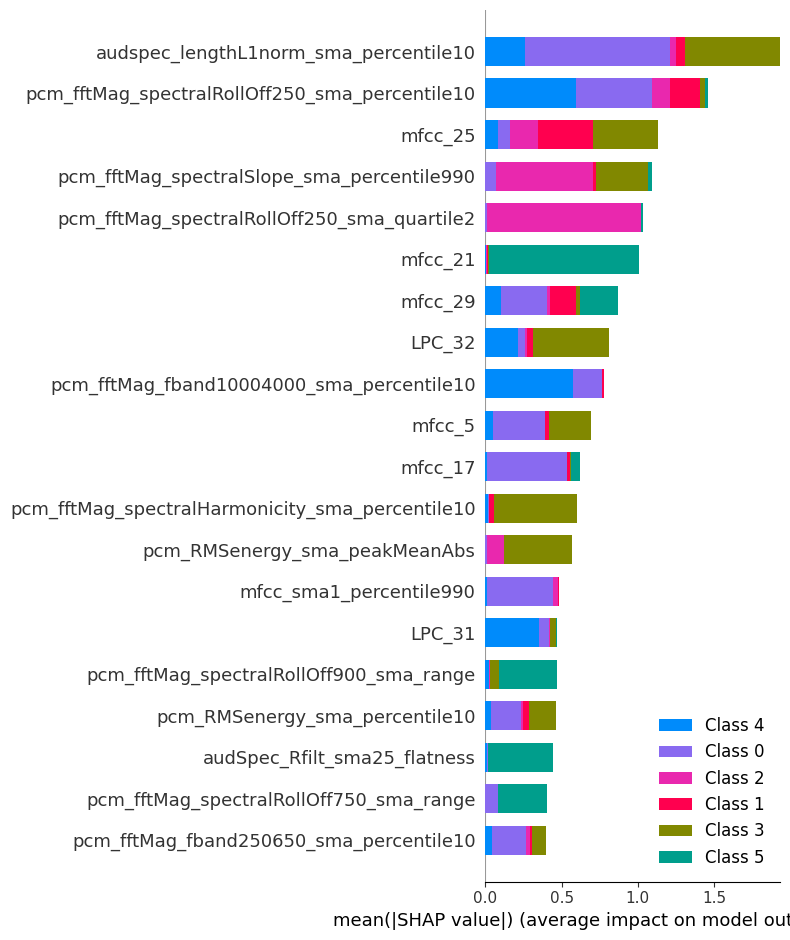

In [86]:
# Explain the model's predictions using SHAP by computing SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(train_feat_df)

#Convert the shap values for each class to a single list
shap_as_list=[]
for i in range(6):
    shap_as_list.append(shap_values[:,:,i])

# Plot the SHAP values
shap.summary_plot(shap_as_list, train_feat_df, plot_type="bar")

In [17]:
y_train.shape

(8979, 0)

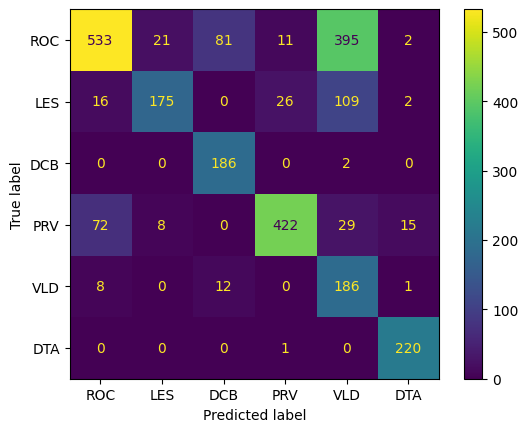

In [89]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix_clean = metrics.confusion_matrix(y_test_clean, model.predict(test_clean_feat_df))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_clean, display_labels = ['ROC','LES','DCB','PRV','VLD', 'DTA'])
cm_display.plot()
plt.show()

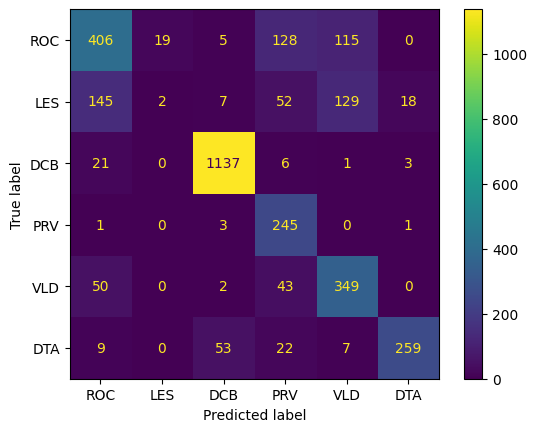

In [90]:
confusion_matrix_noisy = metrics.confusion_matrix(y_test_noisy, model.predict(test_noisy_feat_df))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_noisy, display_labels = ['ROC','LES','DCB','PRV','VLD', 'DTA'])
cm_display.plot()
plt.show()